In [12]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

## Streamline your code
We will: 
- learn how to extract geospatial data from a CSV to create a geopandas.GeoDataFrame
- introduce more customizations for maps and matplotlib figures 
- go over strategies to streamline our code.

In [15]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [16]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

states.columns = states.columns.str.lower()
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to `geopandas.GeoDataFrame`
The power plants file is a CSV. Unlike shapefiles or other geospatial file formats, geopandas doesn’t have a way to extract a geometry column from a CSV file, so we will need to create this geometry manually.

To do so we will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in the NAD83 CRS (EPSG:4269). We can use this information to create a new geopandas.GeoDataFrame from the pandas.DataFrame using the geopandas function points_from_xy():

In [21]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

In [22]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

<Axes: >

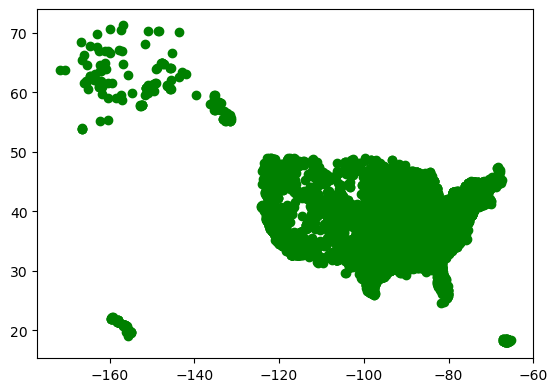

In [24]:
power_plants.plot(color = "green")  

## f-strings
So far, we have printed variables using string concatenation inside the print() function. This means that we write commas between every string and variable we want to print, and then the print() function concatenates these into a single string. 

For example:

In [26]:
print("CRS", power_plants.crs)

CRS EPSG:4269


f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```
f" some text {replace}"
```
`replace` can be a variable, an expression, or a function or method call. For example:

In [28]:
# Explore CRs
print(f'ellipsoid: {power_plants.crs.ellipsoid}')
print(f'datum: {power_plants.crs.datum}')

ellipsoid: GRS 1980
datum: North American Datum 1983


In [32]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is CRS geographic?': <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?':<25} {power_plants.crs.is_projected}")

Is CRS geographic?        True
Is the CRS projected?     False


## Explore TIGER shapefile

In [33]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


In [34]:
print(states.crs)


EPSG:4269


<Axes: >

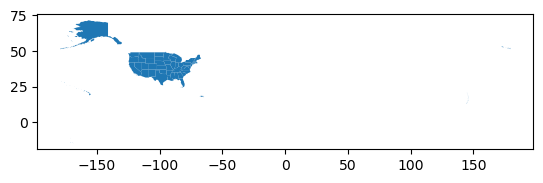

In [35]:

states.plot()

## `for` loops
It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [38]:
# Examine if the region, devision, and statefp columns are string or numeric
print(f"Region is string dtype? {is_string_dtype(states['region'])}")
print(f"Division is string dtype? {is_string_dtype(states['division'])}")
print(f"Statefp is string dtype? {is_string_dtype(states['statefp'])}")

Region is string dtype? True
Division is string dtype? True
Statefp is string dtype? True


This is inconvenient as it repeats the same pieces of code, only changing the column name. Instead, using the for loop allows us to succintly print the same information:

In [39]:
code_cols = ['region', 'division', 'statefp']

for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


***DRY Code***


Don’t Repeat Yourself (DRY)-
A core programming principle that encourages reducing redundancy and consolidating repeated logic. Try implementing it as much as possible! If you need to repeat the “same” code more than twice, you likely need a for loop.

## Assert

The `assert` keyword does nothing if the expression next to it evaluates to True and raises an AssertionError exception and stops your code form running any further if not. 

For example:



In [44]:
# Does nothing if statement is True
assert 2+2==4

# raise an error is statement is False

assert 2+2==5

AssertionError: 

A workflow for updating the data type for code colums to be integers

for each column in code_column:
    - convert column to numeric
    - check if column is numeric using assert

In [47]:
# Update code columns into integers

# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Check conversion

In [48]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object